In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets
from gaslight.grid import Grid
from synthesizer.line import (
    get_diagram_labels,)
from synthesizer import line_ratios

In [2]:

grid_dir = '/Users/sw376/Dropbox/Research/data/gaslight/grids'
# grid_name = 'bpass-2.2.1-bin_chabrier03-0.1,300.0-ages:6.,7.-metallicities:0.0001,0.001,0.01-c23.01-test'
# grid_name = 'bpass-2.2.1-bin_chabrier03-0.1,300.0-ages:6.,7.,8.-c23.01-reduced'
grid_name = 'bpass-2.2.1-bin_chabrier03-0.1,300.0-ages:6.,7.,8.-c23.01-full'
grid_name = 'agnsed-limited-c23.01-agn-limited'
g = Grid(grid_dir=grid_dir, grid_name=grid_name)

Here we plot all models, colour-coded by metallicity

In [3]:
axes_values_list = [g.axes_values[axis] for axis in g.axes]

meshgrid = np.meshgrid(*axes_values_list, indexing='ij')

# put the mesh into a dictionary
mesh = {axis: mesh_ for axis, mesh_ in zip(g.axes, meshgrid)}

# created a flattened mesh dictionary
flattend_mesh = {axis: mesh_.flatten() for axis, mesh_ in mesh.items()}

[[['N 2 6583.45A'], ['H 1 6562.80A']], [['O 3 5006.84A'], ['H 1 4861.32A']]]


/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_10052/224955201.py:12: RuntimeWarning: invalid value encountered in divide
  x = np.sum([g.luminosity[_line].flatten() for _line in a], axis=0) / np.sum([g.luminosity[_line].flatten() for _line in b], axis=0)
/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_10052/224955201.py:16: RuntimeWarning: invalid value encountered in divide
  y = np.sum([g.luminosity[_line].flatten() for _line in a], axis=0) / np.sum([g.luminosity[_line].flatten() for _line in b], axis=0)


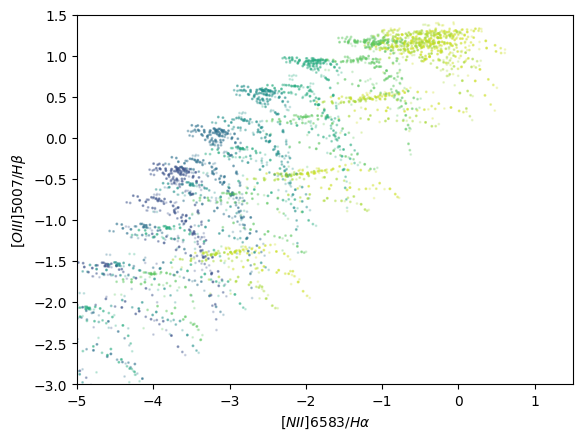

In [4]:
diagram_id = 'BPT-NII'

lines_ids = line_ratios.diagrams[diagram_id]
print(lines_ids)

norm = Normalize(vmin=-5., vmax=-1.)
cmap = cm.viridis


# x
a, b = lines_ids[0]
x = np.sum([g.luminosity[_line].flatten() for _line in a], axis=0) / np.sum([g.luminosity[_line].flatten() for _line in b], axis=0)

# y
a, b = lines_ids[1]
y = np.sum([g.luminosity[_line].flatten() for _line in a], axis=0) / np.sum([g.luminosity[_line].flatten() for _line in b], axis=0)


plt.scatter(np.log10(x), np.log10(y), s=1, alpha=0.2, c=cmap(norm(np.log10(flattend_mesh['metallicity']))))

plt.xlim([-5., 1.5])
plt.ylim([-3., 1.5])

x_label, y_label = get_diagram_labels(diagram_id)

# add axes labels
plt.xlabel(rf'${x_label}$')
plt.ylabel(rf'${y_label}$')

# show
plt.show()
